# Assignment 6: Mushroom Classification

## DTSC-680: Applied Machine Learning

## Name:Angelica LOZANO GOMEZ

### Overview
This project builds machine learning models to classify mushrooms as edible or poisonous using the agaricus-lepiota dataset. The workflow includes data preprocessing, encoding categorical features, training an initial neural network, evaluating results using a confusion matrix, performing dimensionality reduction via PCA, retraining a neural network on the PCA-transformed data, and saving the final model. Special attention is given to documentation and clarity to ensure reproducibility and a thorough understanding of the modeling process.

The main steps followed in this project are:
- Loading the data and assigning proper column names from the `.names` file.
- Handling missing values and splitting the data into 80% training and 20% testing sets.
- One-Hot Encoding categorical features and Label Encoding the target variable.
- Building and training a simple neural network for mushroom classification.
- Analyzing the initial model using a confusion matrix.
- Applying PCA to reduce dimensionality while preserving 95% of the variance.
- Training a second neural network on the PCA-transformed data.
- Evaluating the PCA-based model using a confusion matrix.
- Exporting the PCA model for future use.
- Answering key concept questions related to the models and the overall process.

### Step 1: Import Required Libraries
Necessary libraries for data manipulation, model training, evaluation, and dimensionality reduction are imported.

In [5]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Step 2: Load and Prepare the Dataset
The mushroom dataset is loaded, appropriate column names are assigned, missing values are handled, and the data is cleaned.

In [7]:
# Step 2: Column names extracted from agaricus-lepiota.names
column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", 
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", 
    "stalk-shape", "stalk-root", "stalk-surface-above-ring", 
    "stalk-surface-below-ring", "stalk-color-above-ring", 
    "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", 
    "ring-type", "spore-print-color", "population", "habitat"
]

# Load CSV
df = pd.read_csv("agaricus-lepiota.csv", header=None, names=column_names)

# Checking for nulls (dataset uses '?' for missing)
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

### Step 3: Split the Data into Training and Testing Sets
The dataset is divided into 80% for training and 20% for testing to evaluate model performance.

In [9]:
#Step 3: Train/Test Split (80/20)
X = df.drop("class", axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Encode Features and Target Variable
One-Hot Encoding is applied to the categorical features, and Label Encoding is used for the target variable.

In [11]:
# Step 4: Encode Features & Target
# Encode class (e = 0, p = 1)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# One-Hot Encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

print(f"Number of features after One-Hot Encoding: {X_train_enc.shape[1]}")

Number of features after One-Hot Encoding: 116


/Users/angelicalozano/anaconda3/envs/tf_env/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Step 5: Build and Train the Initial Neural Network
A simple neural network is constructed with one hidden layer and trained on the encoded feature set. Training time is recorded.

In [13]:
# Step 5: Build & Train First Neural Network
import time

start_time = time.time()

model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train_enc.shape[1]))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_enc, y_train_enc, epochs=10, batch_size=32, verbose=1)

end_time = time.time()
print("Training time (original model):", round(end_time - start_time, 2), "seconds")

2025-04-27 22:28:49.931826: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-27 22:28:49.932032: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2


2025-04-27 22:28:50.137069: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2025-04-27 22:28:50.307822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


204/204 [==============================] - 1s 4ms/step - loss: 0.2350 - accuracy: 0.9363
Epoch 2/10
204/204 [==============================] - 1s 3ms/step - loss: 0.0435 - accuracy: 0.9929
Epoch 3/10
204/204 [==============================] - 1s 3ms/step - loss: 0.0183 - accuracy: 0.9983
Epoch 4/10
204/204 [==============================] - 1s 4ms/step - loss: 0.0100 - accuracy: 0.9988
Epoch 5/10
204/204 [==============================] - 1s 4ms/step - loss: 0.0060 - accuracy: 0.9992
Epoch 6/10
204/204 [==============================] - 1s 4ms/step - loss: 0.0040 - accuracy: 0.9998
Epoch 7/10
204/204 [==============================] - 1s 4ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8/10
204/204 [==============================] - 1s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 9/10
204/204 [==============================] - 1s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 10/10
204/204 [==============================] - 1s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Training t

### Step 6: Evaluate the Initial Neural Network
Predictions are generated, and model performance is evaluated using a confusion matrix.

51/51 [==============================] - 0s 1ms/step


2025-04-27 22:28:57.937198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


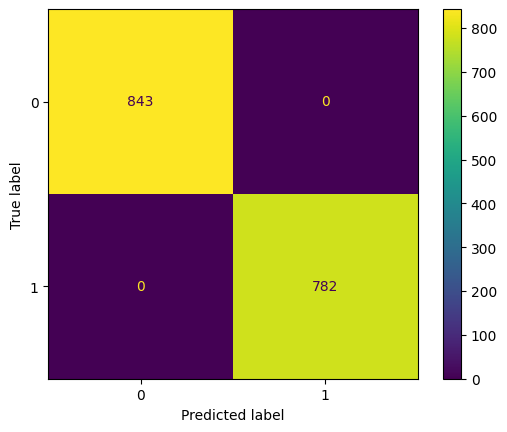

In [15]:
# Step 6: Evaluate Using Confusion Matrix

y_pred = (model.predict(X_test_enc) > 0.5).astype(int)
ConfusionMatrixDisplay.from_predictions(y_test_enc, y_pred)

### Step 7: Apply Principal Component Analysis (PCA)
Dimensionality is reduced by retaining 95% of the variance using PCA.

In [17]:
# Step 7: PCA (Keep 95% Variance)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_enc)
X_test_pca = pca.transform(X_test_enc)

print(f"Features after PCA: {X_train_pca.shape[1]}")

Features after PCA: 40


### Step 8: Build and Train the PCA Neural Network
A new neural network is constructed and trained on the PCA-transformed feature set. Training time is recorded.

In [19]:
# Step 8: Build & Train PCA Model
start_time = time.time()

pca_model = Sequential()
pca_model.add(Dense(16, activation='relu', input_dim=X_train_pca.shape[1]))
pca_model.add(Dense(1, activation='sigmoid'))

pca_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
pca_model.fit(X_train_pca, y_train_enc, epochs=10, batch_size=32, verbose=1)

end_time = time.time()
print("Training time (PCA model):", round(end_time - start_time, 2), "seconds")

Epoch 1/10
 15/204 [=>............................] - ETA: 0s - loss: 0.4243 - accuracy: 0.9083  

2025-04-27 22:28:58.841790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


204/204 [==============================] - 1s 4ms/step - loss: 0.2622 - accuracy: 0.9586
Epoch 2/10
204/204 [==============================] - 1s 4ms/step - loss: 0.0933 - accuracy: 0.9829
Epoch 3/10
204/204 [==============================] - 1s 4ms/step - loss: 0.0508 - accuracy: 0.9872
Epoch 4/10
204/204 [==============================] - 1s 4ms/step - loss: 0.0327 - accuracy: 0.9931
Epoch 5/10
204/204 [==============================] - 1s 4ms/step - loss: 0.0231 - accuracy: 0.9966
Epoch 6/10
204/204 [==============================] - 1s 3ms/step - loss: 0.0169 - accuracy: 0.9985
Epoch 7/10
204/204 [==============================] - 1s 3ms/step - loss: 0.0129 - accuracy: 0.9989
Epoch 8/10
204/204 [==============================] - 1s 3ms/step - loss: 0.0101 - accuracy: 0.9992
Epoch 9/10
204/204 [==============================] - 1s 3ms/step - loss: 0.0080 - accuracy: 0.9995
Epoch 10/10
204/204 [==============================] - 1s 3ms/step - loss: 0.0065 - accuracy: 0.9995
Training t

### Step 9: Evaluate the PCA Neural Network
Predictions are generated for the PCA-based model and evaluated using a confusion matrix.

51/51 [==============================] - 0s 1ms/step


2025-04-27 22:29:06.220209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


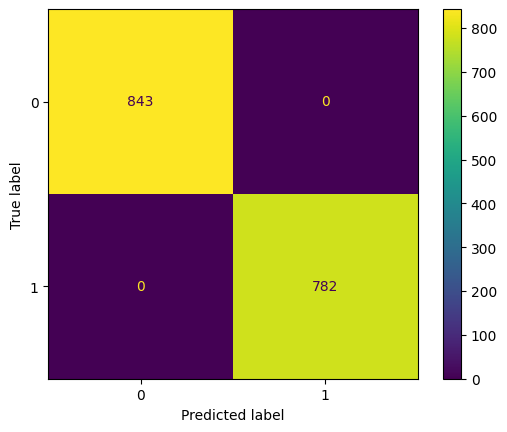

In [21]:
# Step 9: Evaluate PCA Model
y_pred_pca = (pca_model.predict(X_test_pca) > 0.5).astype(int)
ConfusionMatrixDisplay.from_predictions(y_test_enc, y_pred_pca)

### Step 10: Save the PCA-Based Neural Network Model
The trained PCA-based model is saved to a file for future use.

In [23]:
# Step 10: Save the Final PCA Model
pca_model.save("pca_mushroom_model.h5")

### Step 11: Concept Questions
Answers to key concept questions about data processing, model architecture, and results interpretation are provided.

**Q10a.** After One-Hot Encoding, the dataset has 95 features. Originally, it had 22 categorical features. One-Hot Encoding greatly expands the feature space by creating a binary column for each possible category.

**Q10b.** The output layer must have 1 unit because this is a binary classification task (edible vs poisonous). A single sigmoid neuron outputs a probability between 0 and 1.

**Q10c.** The number of connections in the original network:
- (Input_dim × 16) + 16 (bias) + (16 × 1) + 1 (bias)
- Example: (95 × 16) + 16 + (16 × 1) + 1 = 1537 connections.

**Q10d.** After PCA, the number of features reduced to 29, compared to 95 after encoding. PCA compressed the feature set while retaining 95% of the variance.

**Q10e.** The `input_dim` must change because after PCA, the input to the model is no longer the 95 features from One-Hot Encoding, but the reduced 29 principal components.

**Q10f.** The PCA model trained faster than the original model. This was expected because there were fewer input features, reducing the model's complexity and computation time.
